In [1]:

####################################################################################################
####################################################################################################

import datetime
import sys
import glob
import os.path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from IPython.display import display

sys.path.append(os.path.abspath("../../"))
sys.path.append(os.path.abspath("../../pax_utils"))
from s1s2_utils import *

#from model_xy_s2waveforms_dnn import *
from get_dnn_data import *



In [10]:

####################################################################################################
####################################################################################################

#nEventsTrain = 200000
#nEventsTrain = 100000
#nEventsTrain = 10000
nEventsTrain = 50000
#nEventsTrain = 100

input_dir  = "../../pax_merge/merged/apr30/"
input_file = 'merged_all_200000.pkl'
input_path = input_dir + input_file


####################################################################################################
####################################################################################################

cols = [
    'event_number',
    'event_s2_count',
    'event_s2_length',
    'event_s2_left',
    'event_s2_right',
    'intr_count',
    'x',
    'y',
    'intr_x',
    'intr_y']

df_events, s2_window_max = getEventsDataFrame(input_path)
df_events                = df_events[df_events['intr_count'] == 1].reset_index(drop=True)
df_events                = df_events[0:nEventsTrain][:]
#df_events                = df_events[:][cols]


####################################################################################################
####################################################################################################

print(df_events.shape)
display(df_events[0:5][:])

print()
print("Event Max S2 Window size: " + str(s2_window_max))
print()
        


(50000, 155)


,event_number,recoil_type,x,y,depth,s1_photons,s2_electrons,t,event_n_pulses,event_pulses_count,...,s2_area_117,s2_area_118,s2_area_119,s2_area_120,s2_area_121,s2_area_122,s2_area_123,s2_area_124,s2_area_125,s2_area_126
0,1,ER,2.626434,-17.960824,57.456815,164,79,650000.0,400,400,...,6.564991,0.0,0.400128,2.742959,3.460256,8.159419,38.424745,15.890681,1.354377,10.354574
1,3,ER,10.907536,-6.312277,57.780505,212,75,650000.0,516,516,...,3.208600,0.0,0.000000,5.596787,26.363896,126.844246,55.087875,8.130994,8.979807,13.682349
2,5,ER,24.631697,-12.763601,34.074937,47,73,650000.0,417,417,...,3.487908,0.0,1.534094,0.000000,1.919893,4.920848,0.505347,2.435258,0.506562,4.203870
3,6,ER,2.726006,37.749081,64.494053,265,70,650000.0,423,423,...,0.000000,0.0,0.918565,0.619911,0.000000,1.230013,0.788772,1.179353,2.046051,0.000000
4,8,ER,-18.078293,-23.212466,51.510242,320,109,650000.0,540,540,...,12.939582,0.0,3.896350,2.259100,3.023539,0.855252,7.456719,1.257868,4.551362,5.000204



Event Max S2 Window size: 2290



In [11]:

####################################################################################################
# Training Data
####################################################################################################

dir_in = '../../pax_merge/merged/apr30/waveforms_s2waveforms_test_v2/new'

#resample_factor = 2290
resample_factor = 229

assert(s2_window_max % resample_factor == 0)




In [ ]:

####################################################################################################
####################################################################################################
 
train_data, train_truth  = get_data(dir_in, df_events, s2_window_max, resample_factor)

if (resample_factor > 1):
    
    s2_window_max = int(s2_window_max / resample_factor)
    
    
print()
print("Input data shape:       " + str(train_data.shape ))
print("Truth data shape:       " + str(train_truth.shape))
print()


 -> Events Processed: 21232, Event Number: 35364, Time: 0.13


In [9]:


####################################################################################################
####################################################################################################
    
file_out_input = 'train/array_train_input_events%06d_resample%04d' % (nEventsTrain, resample_factor)
file_out_truth = 'train/array_train_truth_events%06d_resample%04d' % (nEventsTrain, resample_factor)
    
np.save(file_out_input, train_data)
np.save(file_out_truth, train_truth)

test_train_data  = np.load(file_out_input + '.npy')
test_train_truth = np.load(file_out_truth + '.npy')

print(test_train_data.shape)
print(test_train_truth.shape)



(10000, 1270)
(10000, 2)


In [4]:

####################################################################################################
####################################################################################################

n_events     = nEventsTrain
n_channels   = 127
n_outputs    = 2

n_timesteps  = s2_window_max

go_backwards = False
unroll       = False


####################################################################################################
# Training Data
####################################################################################################

#train_data  = np.random.random( (n_events, n_timesteps, n_channels) )
#train_truth = np.random.random( (n_events, n_outputs)               )

print()
print("Channels:         " + str(n_channels))
print("Timesteps:        " + str(n_timesteps))
print("Outputs:          " + str(n_outputs) )
print("Input data shape: " + str(train_data.shape ))
print("Truth data shape: " + str(train_truth.shape))
print()




Channels:         127
Timesteps:        1
Outputs:          2
Input data shape: (1000, 127)
Truth data shape: (1000, 2)




Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 127)               16256     
_________________________________________________________________
dense_2 (Dense)              (None, 127)               16256     
_________________________________________________________________
dropout_1 (Dropout)          (None, 127)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 256       
Total params: 32,768
Trainable params: 32,768
Non-trainable params: 0
_________________________________________________________________



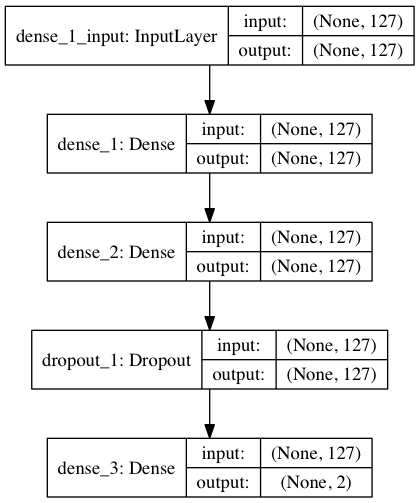

In [5]:

####################################################################################################
####################################################################################################

model, name = dnnModel(n_channels, n_timesteps, n_outputs, 'elu', 0.00005)


######################################################################################
######################################################################################

name_png = 'models/' + name + ".png"
name_h5  = 'models/' + name + ".h5"

plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)
  
print()
print("Model Summary:")
model.summary()
print()
display(Image.open(name_png))
print()



In [7]:

######################################################################################
######################################################################################

model.fit(
    train_data,
    train_truth,
    batch_size=64,
    epochs=10,
    verbose=True
)

print("Training Complete.")


Epoch 1/10
1000/1000 [==============================] - 0s 120us/step - loss: 159.6974
Epoch 2/10
1000/1000 [==============================] - 0s 105us/step - loss: 133.5325
Epoch 3/10
1000/1000 [==============================] - 0s 103us/step - loss: 114.2925
Epoch 4/10
1000/1000 [==============================] - 0s 108us/step - loss: 110.7172
Epoch 5/10
1000/1000 [==============================] - 0s 108us/step - loss: 105.0255
Epoch 6/10
1000/1000 [==============================] - 0s 110us/step - loss: 100.3240
Epoch 7/10
1000/1000 [==============================] - 0s 106us/step - loss: 95.9587
Epoch 8/10
1000/1000 [==============================] - 0s 107us/step - loss: 96.8888
Epoch 9/10
1000/1000 [==============================] - 0s 110us/step - loss: 95.1131
Epoch 10/10
1000/1000 [==============================] - 0s 138us/step - loss: 95.2504
Training Complete.


In [8]:

######################################################################################
# Save Model
######################################################################################

folder  = "models/"    
name_h5 = folder + name + ".h5"

#model.save(name_h5, overwrite=True)

print(name_h5)


models/model_xy_s2waveforms_dnn_elu.h5
